## Reading a Spatial Data Set using the GDAL Wrapper

In [1]:
# First, we import the io_gdal module
from plio.io import io_gdal

In [2]:
# We will use an example that ships with plio, so we use the get_path function in the examples module
from plio.examples import get_path

In [3]:
# For this example, we will use a lambert projected LOLA hillshade.
path_to_our_example = get_path('Lunar_LRO_LOLA_Shade_MAP2_90.0N20.0_LAMB.tif')
ds = io_gdal.GeoDataset(path_to_our_example)

In [4]:
# Just printing the geodataset object returns the filename
ds

Lunar_LRO_LOLA_Shade_MAP2_90.0N20.0_LAMB.tif

In [5]:
# Here we want to see what attributes and methods are available on the geodataset.
attributes = [i for i in dir(ds) if not i.startswith('__')]
print(attributes)

['base_name', 'central_meridian', 'coordinate_transformation', 'dataset', 'file_name', 'footprint', 'geospatial_coordinate_system', 'geotransform', 'inverse_coordinate_transformation', 'latlon_corners', 'latlon_extent', 'latlon_to_pixel', 'metadata', 'no_data_value', 'pixel_area', 'pixel_height', 'pixel_to_latlon', 'pixel_width', 'proj_corners', 'proj_extent', 'raster_size', 'read_array', 'scale', 'spatial_reference', 'spheroid', 'standard_parallels', 'unit_type', 'x_rotation', 'xy_corners', 'xy_extent', 'y_rotation']


The dataset lazy loads, the the `read_array` method has not yet read any data into memory beyond the file handle.  In fact, most of the attributes lazy load and will not populate until we access them.

In [6]:
# Get some PATH information for the data set
print('The filename is {}'.format(ds.base_name))
print('The full PATH is {}'.format(ds.file_name))

The filename is Lunar_LRO_LOLA_Shade_MAP2_90.0N20.0_LAMB
The full PATH is /Users/jlaura/github/plio/plio/examples/Projections/Lunar_LRO_LOLA_Shade_MAP2_90.0N20.0_LAMB.tif


In [7]:
# How about a spatial reference.
print(ds.spatial_reference)

PROJCS["LambertConformal_MOON",
    GEOGCS["GCS_MOON",
        DATUM["MOON",
            SPHEROID["MOON",1737400,0]],
        PRIMEM["Reference_Meridian",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Lambert_Conformal_Conic_2SP"],
    PARAMETER["standard_parallel_1",73],
    PARAMETER["standard_parallel_2",42],
    PARAMETER["latitude_of_origin",90],
    PARAMETER["central_meridian",20],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]


The above is a human readable WKT string.  We can take that to proj4 if we like using GDAL functionality (GDAL is a dependency, so it is installed on your system already!)

In [8]:
# Have a look at what exactly the string we see above it.
srs = ds.spatial_reference
type(srs)

osgeo.osr.SpatialReference

In [9]:
# And convert to a proj4 string
srs.ExportToProj4()

'+proj=lcc +lat_1=73 +lat_2=42 +lat_0=90 +lon_0=20 +x_0=0 +y_0=0 +a=1737400 +b=1737400 +units=m +no_defs '

Frequently, in development we need to know a bit about an image.  Things like the resolution of the pixels or the spatial extent.  These attributes are also available.

In [10]:
# The extent in geographic coordinates.
print('The data set extent (in GCS) is: {}'.format(ds.latlon_extent))

# or the resolution.
print('The data set resolution is {},{}'.format(ds.pixel_width, ds.pixel_height))
# The pixel width and height are as we expect them to be.  The y-axis is negative and the pixels are square.

The data set extent (in GCS) is: [(69.90349154912009, -29.72166902463681), (37.86992376608661, 39.11610200134293)]
The data set resolution is 3870.0,-3870.0


Sometimes we also want to convert from a lat/lon coordinate to a pixel.  This requires use of the spatial reference and the geotransformation parameters.  This is not an exceptionally robust transformation using a camera model, but a simple affine transformation.

In [11]:
# Convert from pixel to lat/lon
ds.pixel_to_latlon(100,100)

(62.79324246013935, 14.209561437813814)

In [12]:
# And vice-versa
ds.latlon_to_pixel(62.79324246013935, 14.209561437813814)
# Here we illustrate the imperfection of the transformation...
# In practice pixels are measures in whole numbers, so we round.

(100.00000000000001, 99.99999999999997)

In [13]:
# Finally, we can access the image data itself as a NumPy array
arr = ds.read_array()
type(arr)

numpy.ndarray

In [14]:
arr.shape

(275, 239)

In [15]:
# Just an iPython magic to get the figure as an embedded png
%pylab inline

Populating the interactive namespace from numpy and matplotlib


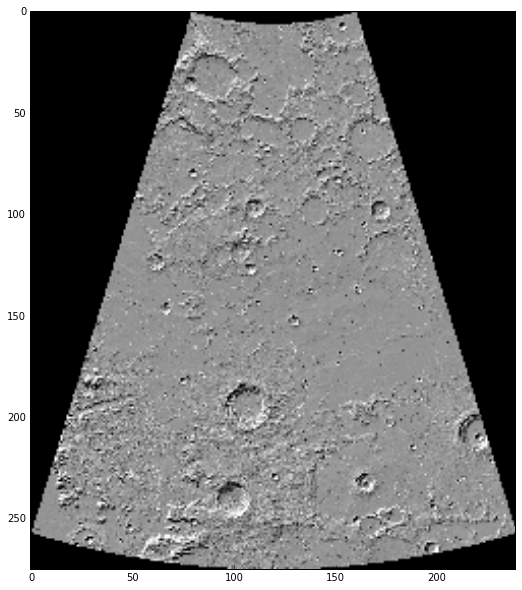

In [16]:
# Finally, a plot (this image has been downsamples a ton to make it easier to ship via github - just an example!)
figsize(10,10)
imshow(arr, cmap='gray')
show()